선택한 kaggle : [Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance?datasetId=13720&sortBy=voteCount)


필사한 노트북 : [EDA + Regression](https://www.kaggle.com/code/hely333/eda-regression)

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('data/insurance.csv')

In [4]:
# data 확인

print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* 결측치가 없다는 것은 매우 기분 좋은 스타트이다. :D
* 어떤 항목이 charge와 상관관계가 있는지 알아보도록 한다.
* 우선 인코딩을 진행하기로 한다.

In [6]:
from sklearn.preprocessing import LabelEncoder

# sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)

# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)

# region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

**"region"에 대한 정보**
* 일반적으로, 넓은 범위의 분류형 변수들은 OneHotEncoder가 가장 좋은 선택이다.
* 하지만 이번 경우에는 regions에 특별히 많은 변수들이 존재하지 않기 때문에 Lable Encoder를 사용한다.

In [7]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

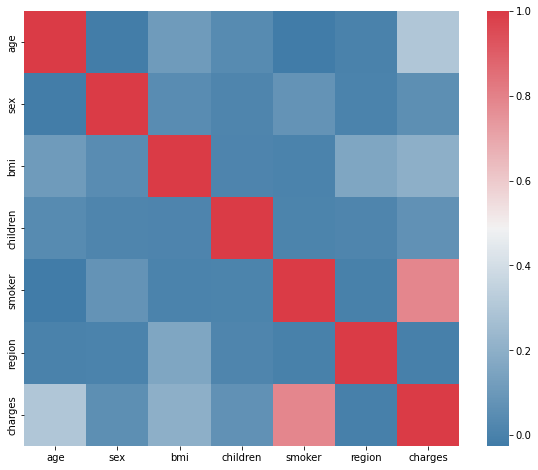

In [9]:
f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax);

* smoker(흡연가)와 charges 사이에 매우 강한 상관관계가 있는 것을 확인 할 수 있다.
* charges의 분포도를 확인해보도록 한다. 이 작업은 환자들이 치료에 사용한 charge의 평균을 확인하는데 도움을 줄 수 있다.


* 여담으로, 금연합시다.

In [14]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
p = figure(title="Distribution of charges",tools="save",
            background_fill_color="#E8DDCB")
hist, edges = np.histogram(data.charges)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
show(p,ncols = 2, plot_width=400, plot_height=400, toolbar_location=None)

Loading BokehJS ...

<AxesSubplot:>

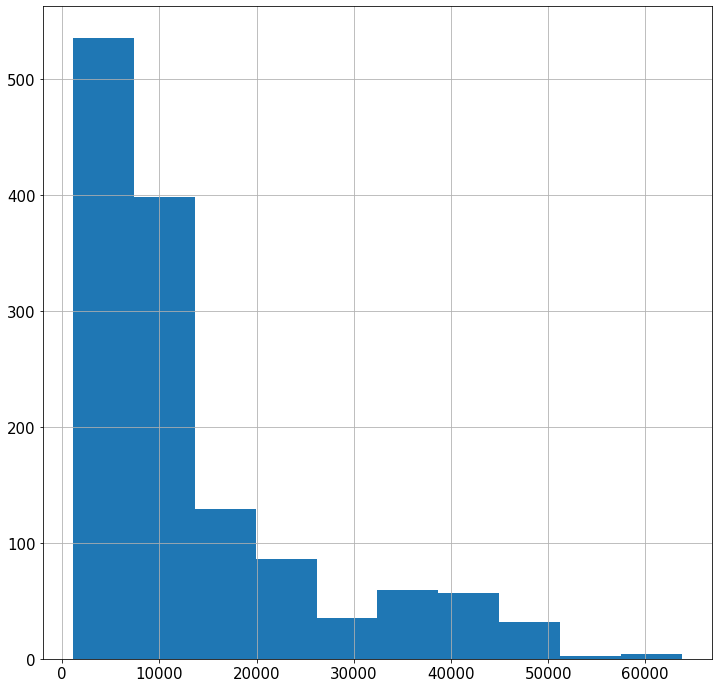

In [75]:
data["charges"].hist(bins = 10, figsize = (12,12), xlabelsize=15, ylabelsize=15)

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

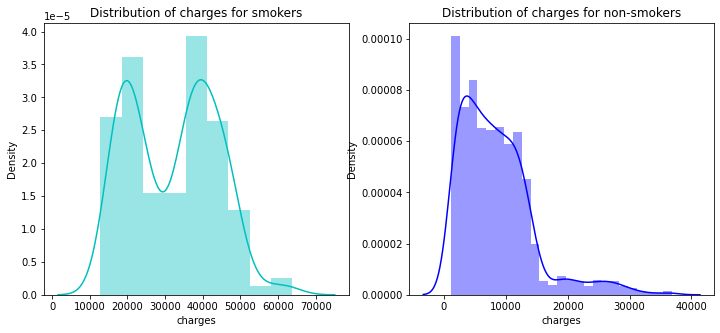

In [15]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

* 흡연 환자들이 치료에 돈을 더 쓴다.
* 하지만, 비흡연자의 숫자가 더 큰 느낌이 든다.

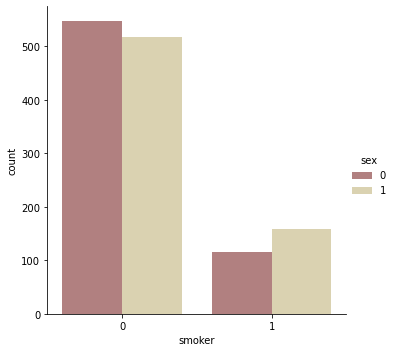

In [16]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

* 여성이 1, 남성이 0이다.
* 흡연자의 영향 때문에 전체 치료비는 남자가 여자보다 더 많을 것이다.

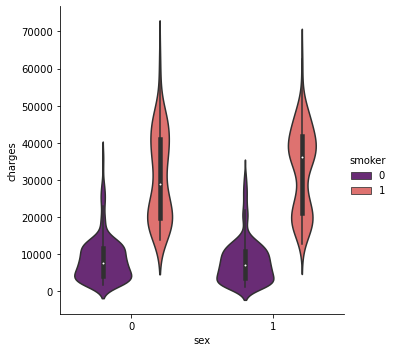

In [17]:
sns.catplot(x="sex", y="charges", hue="smoker", kind="violin"
            , data=data, palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

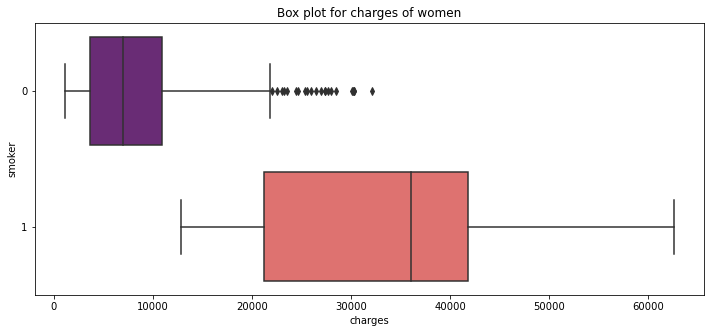

In [19]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , 
            orient="h", palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

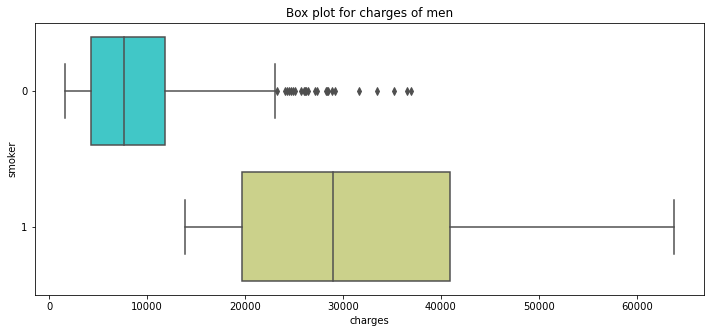

In [20]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] 
            , orient="h", palette = 'rainbow')

* 이제 환자의 나이에 주목해보도록 한다.
* 우선, 나이가 치료비에 어떤 영향을 미치는지, 또 어느 나이가 많은지를 확인해보도록 한다.

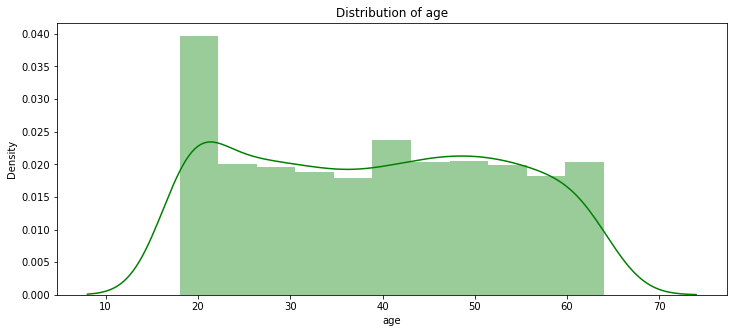

In [21]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

* 20세 이하의 환자가 데이터에 존재하는 것을 확인 할 수 있다.
* 최고령 환자는 64세이다.
* 과연, 18세 환자 중에 흡연자가 있을까?

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

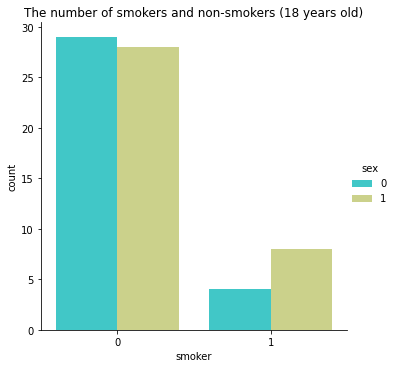

In [22]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow"
            , data=data[(data.age == 18)])
pl.title("The number of smokers and non-smokers (18 years old)")

* 미성년자 흡연자가 기여코 나타나고 말았다.
* 이 나이대에 흡연이 치료비에 영향을 미치는가?

<AxesSubplot:title={'center':'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

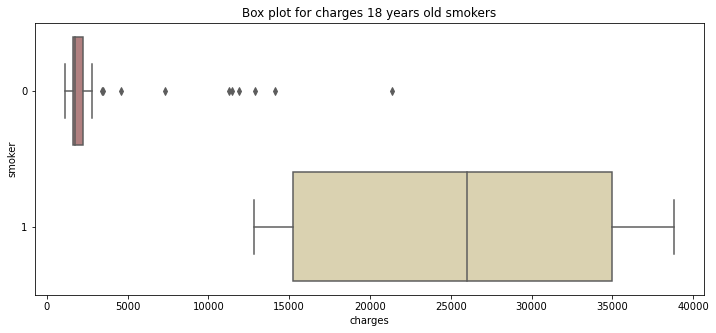

In [23]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] 
            , orient="h", palette = 'pink')

* 18세의 젊은 나이에도 불구하고 흡연자의 치료비용은 비흡연자보다 매우 큰 것을 확인할 수 있다.
* 비 흡연자에 tails를 확인할 수 있는데, 이는 심각한 질병이나 사고에 의한 것으로 판단된다.
* 나이에 따른 흡연유무가 치료비에 어떤 영향을 미치는 지 확인해보자.

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

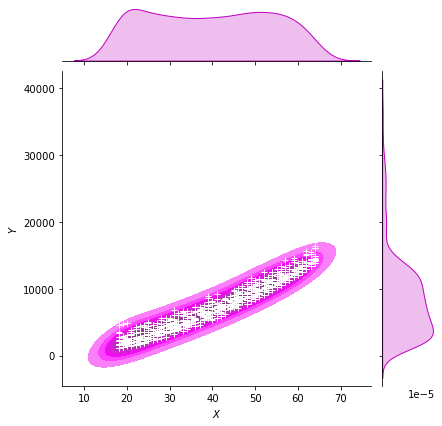

In [62]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", color="m", fill = True)

# plot_joint : g에다 scatter plot을 "+" 형태로 추가.
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

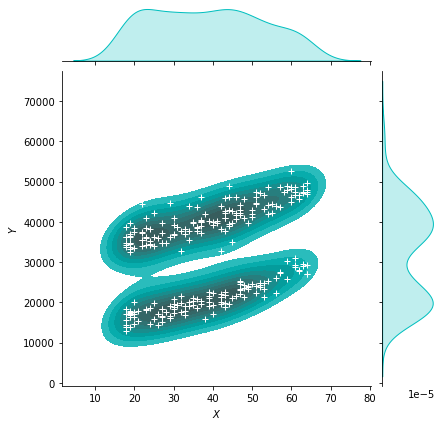

In [57]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c", fill = True)
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

In [30]:
# non - smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 0)].age,y=data[(data.smoker == 0)].charges, 
         size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)

In [31]:
# smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 1)].age,y=data[(data.smoker == 1)].charges, 
         size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

Text(0.5, 1.0, 'Smokers and non-smokers')

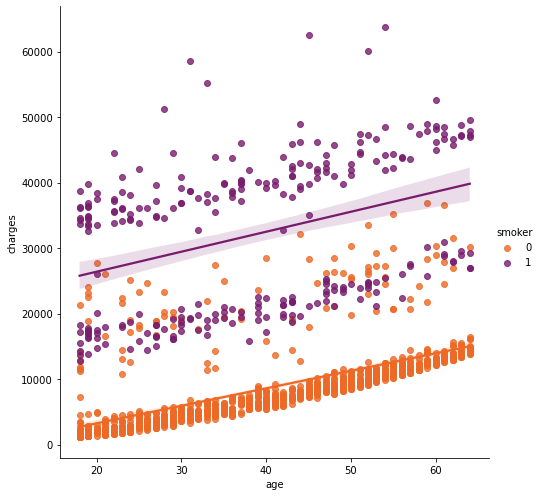

In [32]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

* 비흡연자의 경우, 나이에 비례해서 치료비가 증가한다.(자연의 이치)
* 흡연자의 경우, 상관성을 보기가 어렵다.
* 흡연자 뿐만 아니라 데이터셋에 특이점이 있는 것으로 보인다.
* bmi수치를 확인해보도록 하자.

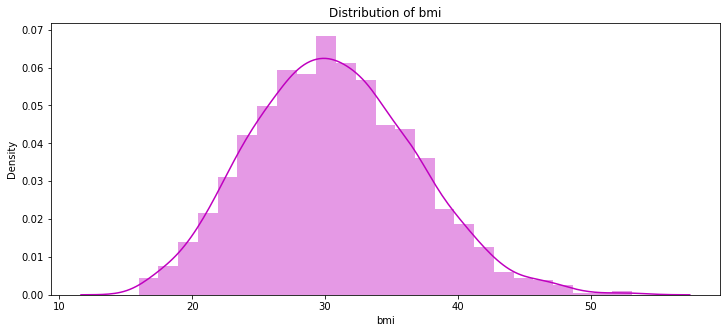

In [33]:
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

* bmi의 데이터는 정규분포 형태를 띄고 있다.
* bmi는 30을 기준(노트북 작성자 피셜 구글이 30이 당연하다고 주장함)으로 이상와 미만을 확인해보자.

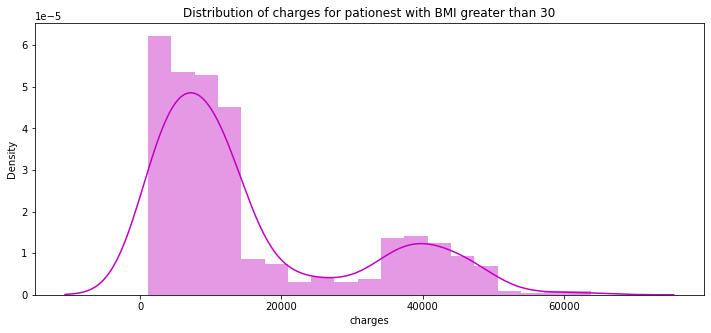

In [34]:
pl.figure(figsize = (12,5))
pl.title("Distribution of charges for pationest with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]["charges"], color = "m")

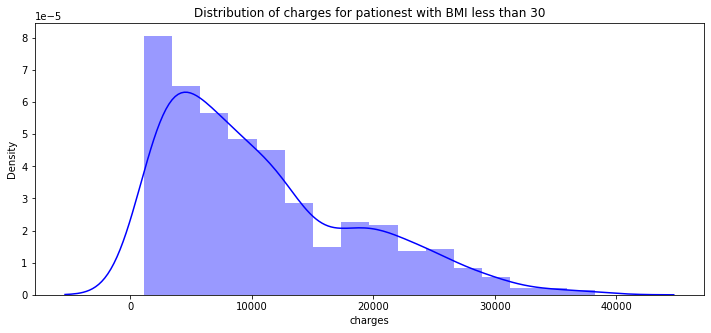

In [36]:
pl.figure(figsize = (12,5))
pl.title("Distribution of charges for pationest with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]["charges"], color = "b")

* BMI 30 이상의 환자들이 치료비 지출이 더 많다.
* 살뺍시다.

Text(0.5, 1.0, 'Distribution of bmi and charges')

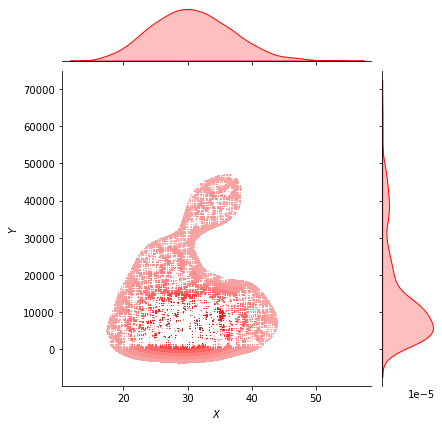

In [58]:
g = sns.jointplot(x = "bmi", y = "charges", data = data, kind = "kde", color = "r", fill = True)
g.plot_joint(pl.scatter, c = "w", s = 30, linewidth = 1, marker = "+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')

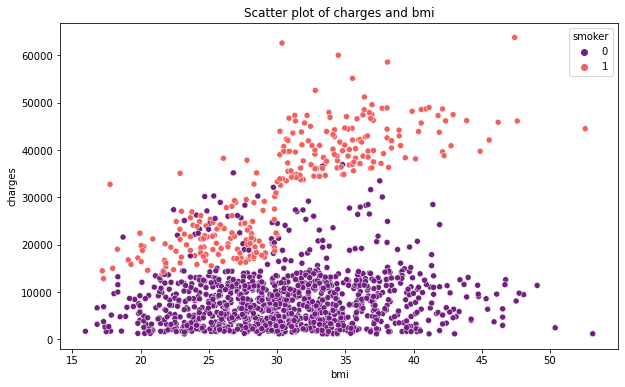

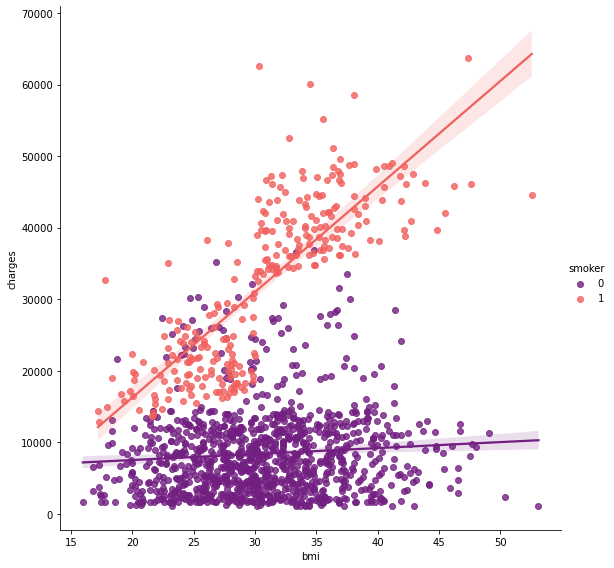

In [39]:
pl.figure(figsize = (10,6))
ax = sns.scatterplot(x = "bmi", y = "charges", data = data, palette = "magma"
                    , hue = "smoker")
ax.set_title("Scatter plot of charges and bmi")

sns.lmplot(x = "bmi", y = "charges", hue = "smoker", data = data, palette = "magma"
          , size = 8)

* 이제 아이를 가진 환자들이 얼마나 있는지 알아보도록 하자.

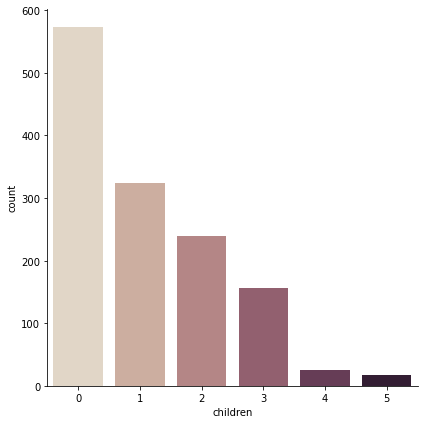

In [41]:
sns.catplot(x = "children", kind = "count", palette = "ch:.25", data = data, size = 6)

* 대부분의 환자들이 아이를 가지지 않고 있다.
* 아이를 가진 사람들 중에 흡연자가 얼마나 있는지 확인해보자

Text(0.5, 1.0, 'Smokers and non-smokers who have childerns')

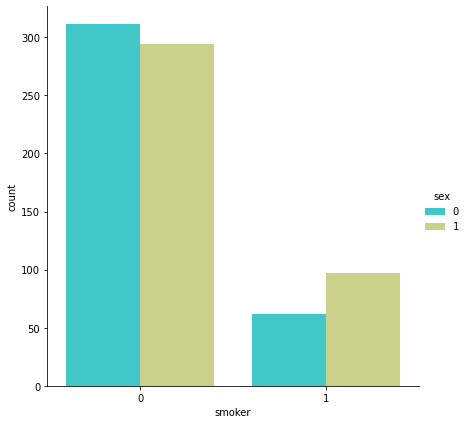

In [43]:
sns.catplot(x = "smoker", kind = "count", palette = "rainbow", hue = "sex",
           data = data[(data.children  > 0)], size = 6)
ax.set_title("Smokers and non-smokers who have childerns")

* 흡연자 부모 환자가 있긴 하지만, 대부분은 비흡연자 부모이다.

* 몇가지 아이디어가 떠오른다. 설명은 나중에 하도록 하겠다.
* 우선, linear regression을 진행해보도록 하자.

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [47]:
X = data.drop(["charges"], axis  =1)
y = data.charges

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

0.7962732059725786


* 데이터 정규화 없이도 나쁘지 않은 결과값을 받았다.
* 이제 Polynomial signs(다항식)를 추가해보자.

In [49]:
X = data.drop(["charges", "region"], axis  =1)
y = data.charges

quad = PolynomialFeatures (degree = 2)
X_quad = quad.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_quad, y, random_state = 0)

plr = LinearRegression().fit(X_train, y_train)

y_train_pred = plr.predict(X_train)
y_test_pred = plr.predict(X_test)

print(plr.score(X_test, y_test))

0.8849197344147238


* 현재 우리 모델은 예측을 꽤 잘하는 것 같다.
* polynomonal features를 2~3개로 제한할 수 있을 것 같다.
* 하지만, 데이터셋이 너무 작기 때문에 다른 손쉬운 방법을 사용하도록 하자.
* 그리고 이번엔 RandomForestRegressor을 사용하도록 한다.

In [54]:
forest = RandomForestRegressor(n_estimators= 100,
                               criterion= 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(X_train, y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

print("MSE train data : %.3f, MSE test data : %.3f"%(
mean_squared_error(y_train, forest_train_pred),
mean_squared_error(y_test, forest_test_pred)))
print("R2 train data : %.3f, R2 test data : %.3f"%(
r2_score(y_train, forest_train_pred),
r2_score(y_test, forest_test_pred)))

MSE train data : 3975386.723, MSE test data : 20185747.162
R2 train data : 0.972, R2 test data : 0.872


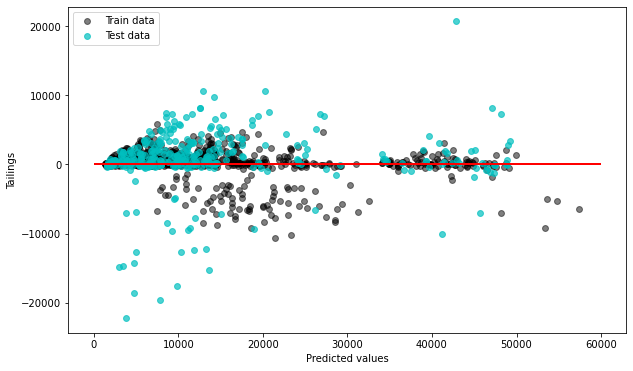

In [55]:
pl.figure(figsize = (10,6))
# s : marker size
pl.scatter(forest_train_pred, forest_train_pred - y_train,
          c = "black", marker = "o", s = 35, alpha = 0.5, label = "Train data")
pl.scatter(forest_test_pred, forest_test_pred - y_test,
          c = "c", marker = "o", s = 35, alpha = 0.7, label = "Test data")
pl.xlabel("Predicted values")
pl.ylabel("Tailings")

# 머릿말을 왼쪽 상단에 위치
pl.legend(loc = "upper left")

# 경계선 표시
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = "red")
pl.show()